# Analyzing Used Car Listings on eBay

In this project, we'll work with a dataset of used cars from German eBay website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auc=pd.read_csv("auctioned.csv")

In [3]:
auc.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08


In [4]:
auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [5]:
auc = pd.read_csv("auctioned.csv", parse_dates=["dateCrawled","dateCreated","lastSeen"])
# auc["dateCrawled"]=pd.to_datetime(auc["dateCrawled"])
# auc["dateCreated"]=pd.to_datetime(auc["dateCreated"])
# auc["lastSeen"]=pd.to_datetime(auc["lastSeen"])

In [6]:
auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50000 non-null  datetime64[ns]
 1   name                 50000 non-null  object        
 2   seller               50000 non-null  object        
 3   offerType            50000 non-null  object        
 4   price                50000 non-null  object        
 5   abtest               50000 non-null  object        
 6   vehicleType          44905 non-null  object        
 7   yearOfRegistration   50000 non-null  int64         
 8   gearbox              47320 non-null  object        
 9   powerPS              50000 non-null  int64         
 10  model                47242 non-null  object        
 11  odometer             50000 non-null  object        
 12  monthOfRegistration  50000 non-null  int64         
 13  fuelType             45518 non-

In [7]:
auc.describe(include="all")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
first,2016-03-05 14:06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-11 00:00:00,NaN,NaN,2016-03-05 14:45:46
last,2016-04-07 14:36:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,2016-04-07 14:58:50
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN


In [8]:
auc.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [9]:
auc[auc["vehicleType"].isnull()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22,0,7426,2016-03-26 18:18:10
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,privat,Angebot,$999,test,NaN,2017,manuell,90,NaN,"150,000km",4,benzin,volkswagen,nein,2016-03-14,0,86157,2016-04-07 03:16:21
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,privat,Angebot,$350,control,NaN,2000,NaN,0,NaN,"150,000km",0,benzin,mercedes_benz,NaN,2016-03-16,0,17498,2016-03-16 18:45:34
27,2016-03-27 18:45:01,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,privat,Angebot,$0,control,NaN,2005,NaN,0,NaN,"150,000km",0,NaN,ford,NaN,2016-03-27,0,66701,2016-03-27 18:45:01
46,2016-03-31 10:53:28,BMW_mit__Lpg,privat,Angebot,"$9,000",control,NaN,2005,automatik,0,NaN,"150,000km",0,NaN,bmw,NaN,2016-03-31,0,12351,2016-04-06 03:44:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49938,2016-03-28 18:45:06,Mercedes_Benz_A_160_Avantgarde,privat,Angebot,"$2,300",control,NaN,2016,automatik,102,a_klasse,"150,000km",6,benzin,mercedes_benz,nein,2016-03-28,0,13507,2016-04-07 00:44:35
49943,2016-03-16 20:46:08,Opel_astra,privat,Angebot,$0,control,NaN,2016,manuell,101,astra,"150,000km",8,benzin,opel,NaN,2016-03-16,0,89134,2016-03-17 19:44:20
49984,2016-03-31 22:48:48,Student_sucht_ein__Anfaengerauto___ab_2000_BJ_...,privat,Angebot,$0,test,NaN,2000,NaN,0,NaN,"150,000km",0,NaN,sonstige_autos,NaN,2016-03-31,0,12103,2016-04-02 19:44:53
49985,2016-04-02 16:38:23,Verkaufe_meinen_vw_vento!,privat,Angebot,"$1,000",control,NaN,1995,automatik,0,NaN,"150,000km",0,benzin,volkswagen,NaN,2016-04-02,0,30900,2016-04-06 15:17:52


In [10]:
fill = auc.mode().to_dict(orient="record")[0]
fill

D:\anaconda\lib\site-packages\pandas\core\frame.py:1554: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


{'dateCrawled': Timestamp('2016-03-05 16:57:05'),
 'name': 'Ford_Fiesta',
 'seller': 'privat',
 'offerType': 'Angebot',
 'price': '$0',
 'abtest': 'test',
 'vehicleType': 'limousine',
 'yearOfRegistration': 2000.0,
 'gearbox': 'manuell',
 'powerPS': 0.0,
 'model': 'golf',
 'odometer': '150,000km',
 'monthOfRegistration': 0.0,
 'fuelType': 'benzin',
 'brand': 'volkswagen',
 'notRepairedDamage': 'nein',
 'dateCreated': Timestamp('2016-04-03 00:00:00'),
 'nrOfPictures': 0.0,
 'postalCode': 10115.0,
 'lastSeen': Timestamp('2016-04-07 06:17:27')}

In [11]:
auc.fillna(fill,inplace=True)

In [12]:
auc.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
odometer               0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [13]:
auc.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37


In [14]:
# strip for remove space by default starting and ending
auc["price"]=auc["price"].str.strip("$").str.replace(",","").astype(int)

In [15]:
auc["odometer"]=auc["odometer"].str.strip("km").str.replace(",","").astype(int)

In [16]:
# delete variables which are not useful. axis 1 mean column
auc.drop(["seller","offerType","nrOfPictures"],axis=1,inplace=True)

In [17]:
# check number of rows and columns
auc.shape

(50000, 17)

In [18]:
# data points rows*columns
50000*17

850000

In [19]:
# unique values and their count
auc["yearOfRegistration"].value_counts().sort_index().head(15)

1000    1
1001    1
1111    1
1500    1
1800    2
1910    9
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
Name: yearOfRegistration, dtype: int64

In [20]:
auc["yearOfRegistration"].value_counts().sort_index().tail(15)

2016    1316
2017    1453
2018     492
2019       3
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       2
9996       1
9999       4
Name: yearOfRegistration, dtype: int64

In [21]:
# only take values between 1910-2016  we don't select 2017 and 2018 because we see on dateCrawled variable has latest 2016 so we know this data is till 2016
corrected_df=auc[auc["yearOfRegistration"].between(1910,2016)].copy()

In [22]:
corrected_df

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T�V_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___T�V_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08,35683,2016-04-05 16:45:07


In [23]:
corrected_df["yearOfRegistration"].min()

1910

In [24]:
corrected_df["yearOfRegistration"].max()

2016

In [25]:
corrected_df["price"].head(3)

0    5000
1    8500
2    8990
Name: price, dtype: int32

In [26]:
corrected_df["price"].value_counts().sort_index().tail(15)

265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    1
27322222    1
99999999    1
Name: price, dtype: int64

In [27]:
# only take values between 1-350000 because after 350000 there is a dummy values
cleaned_price=corrected_df[corrected_df["price"].between(1,350000)].copy()

In [28]:
cleaned_price

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T�V_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___T�V_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08,35683,2016-04-05 16:45:07


In [29]:
cleaned_price["price"].min()

1

In [30]:
cleaned_price["price"].max()

350000

In [31]:
cleaned_price.shape

(46681, 17)

In [32]:
# normalize brand to check which are the most selling brand
all_brand=cleaned_price["brand"].value_counts(normalize=True)*100
all_brand

volkswagen        21.126368
bmw               11.004477
opel              10.758124
mercedes_benz      9.646323
audi               8.656627
ford               6.989996
renault            4.714980
peugeot            2.984083
fiat               2.564212
seat               1.827296
skoda              1.640925
nissan             1.527388
mazda              1.518819
smart              1.415994
citroen            1.400998
toyota             1.270324
hyundai            1.002549
sonstige_autos     0.981127
volvo              0.914719
mini               0.876159
mitsubishi         0.822604
honda              0.784045
kia                0.706926
alfa_romeo         0.664082
porsche            0.612669
suzuki             0.593389
chevrolet          0.569825
chrysler           0.351321
dacia              0.263490
daihatsu           0.250637
jeep               0.227073
subaru             0.214220
land_rover         0.209936
saab               0.164949
jaguar             0.156381
daewoo             0

In [33]:
# we only take the brands which are greater than 5
top_brand=all_brand[all_brand>5]
top_brand

volkswagen       21.126368
bmw              11.004477
opel             10.758124
mercedes_benz     9.646323
audi              8.656627
ford              6.989996
Name: brand, dtype: float64

In [34]:
top_brand.index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [35]:
cleaned_price["brand"]

0           peugeot
1               bmw
2        volkswagen
3             smart
4              ford
            ...    
49995          audi
49996          opel
49997          fiat
49998          audi
49999          opel
Name: brand, Length: 46681, dtype: object

In [36]:
# only take the data where are these top brands 
popular_brand=cleaned_price[cleaned_price["brand"].isin(top_brand.index)]

In [37]:
popular_brand["brand"].unique()

array(['bmw', 'volkswagen', 'ford', 'mercedes_benz', 'audi', 'opel'],
      dtype=object)

In [38]:
popular_brand["brand"].value_counts()

volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
Name: brand, dtype: int64

In [39]:
brand_mean_price=popular_brand.groupby("brand")["price"].mean().sort_values(ascending=False)

In [40]:
brand_mean_price

brand
audi             9336.687454
mercedes_benz    8628.450366
bmw              8332.820518
volkswagen       5402.410262
ford             3749.469507
opel             2975.241935
Name: price, dtype: float64

In [41]:
brand_mean_milege=popular_brand.groupby("brand")["odometer"].mean().sort_values(ascending=False)

In [42]:
brand_mean_milege

brand
bmw              132572.513140
mercedes_benz    130788.363313
opel             129310.035842
audi             129157.386785
volkswagen       128707.158791
ford             124266.012872
Name: odometer, dtype: float64

In [43]:
# convert series into dataframe
price_mil=pd.DataFrame(brand_mean_price)

In [44]:
price_mil

,price
brand,
audi,9336.687454
mercedes_benz,8628.450366
bmw,8332.820518
volkswagen,5402.410262
ford,3749.469507
opel,2975.241935


In [45]:
# change column name
price_mil.columns=["mean_price"]

In [46]:
price_mil

,mean_price
brand,
audi,9336.687454
mercedes_benz,8628.450366
bmw,8332.820518
volkswagen,5402.410262
ford,3749.469507
opel,2975.241935


In [47]:
# removing index name
price_mil.index.name=None

In [48]:
price_mil

,mean_price
audi,9336.687454
mercedes_benz,8628.450366
bmw,8332.820518
volkswagen,5402.410262
ford,3749.469507
opel,2975.241935


In [49]:
# add column mean_milege on price_mil data frame
price_mil["mean_milege"]=brand_mean_milege

In [50]:
price_mil

,mean_price,mean_milege
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


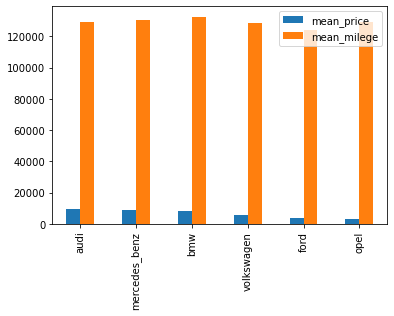

In [51]:
price_mil.plot.bar()
plt.show()

In [52]:
# normalize the data
normalize=price_mil.copy()

In [53]:
cols = price_mil.columns
cols

Index(['mean_price', 'mean_milege'], dtype='object')

In [54]:
for i in cols:
    normalize[i] = normalize[i]/normalize[i].sum()

In [55]:
normalize

,mean_price,mean_milege
audi,0.242984,0.166697
mercedes_benz,0.224553,0.168802
bmw,0.216859,0.171105
volkswagen,0.140596,0.166116
ford,0.097579,0.160384
opel,0.077430,0.166894


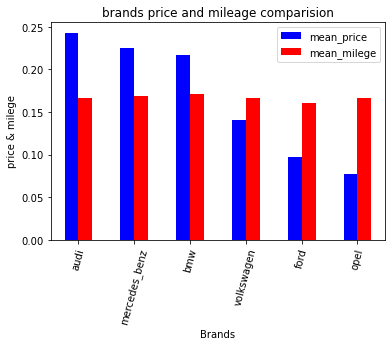

In [56]:
normalize.plot.bar(title = "brands price and mileage comparision", 
                   color = ["blue", "red"], rot = 75)
plt.xlabel("Brands")
plt.ylabel("price & milege")
plt.show()

In [57]:
popular_brand.head(3)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T�V_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01 14:38:50


In [58]:
brand_model=popular_brand.groupby("brand")["model"].value_counts()

In [59]:
brand_model

brand       model  
audi        a4         1231
            a3          825
            a6          797
            andere      216
            80          198
                       ... 
volkswagen  up           51
            jetta        38
            phaeton      31
            cc           18
            amarok        6
Name: model, Length: 101, dtype: int64

In [60]:
brand_model["audi"].index[0]

'a4'

In [61]:
top_brand.index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [62]:
c_b=top_brand.index

In [63]:
for i in c_b:
    print(i)

volkswagen
bmw
opel
mercedes_benz
audi
ford


In [64]:
b_top_m={}
for i in c_b:
    model=brand_model[i].index[0]
    b_top_m[i]=model

In [65]:
print("top cars brand and their top model")
b_top_m

top cars brand and their top model


{'volkswagen': 'golf',
 'bmw': '3er',
 'opel': 'corsa',
 'mercedes_benz': 'c_klasse',
 'audi': 'a4',
 'ford': 'focus'}